# Set up environment

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import GPy
%matplotlib inline
plt.style.use('seaborn')
def save_figure(fig, name):
    figure_dir = '../thesis/figures/'
    fig.savefig(figure_dir + name)

{'covariance': [[<matplotlib.lines.Line2D at 0x285fcd09390>]]}

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


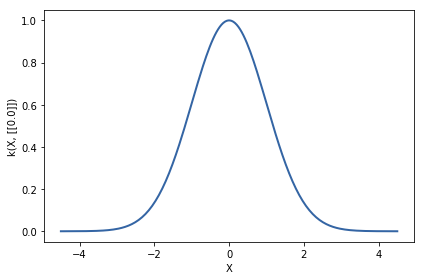

In [7]:

n = 5
X = np.random.uniform(-3.,3.,(n,1))
Y = np.sin(X) + np.random.randn(n,1)*0.05
kernel = GPy.kern.RBF(input_dim=1, variance = 1., lengthscale= 1.)
m = GPy.models.GPRegression(X, Y, kernel)
kernel.plot()

# Sample prior for different kernels

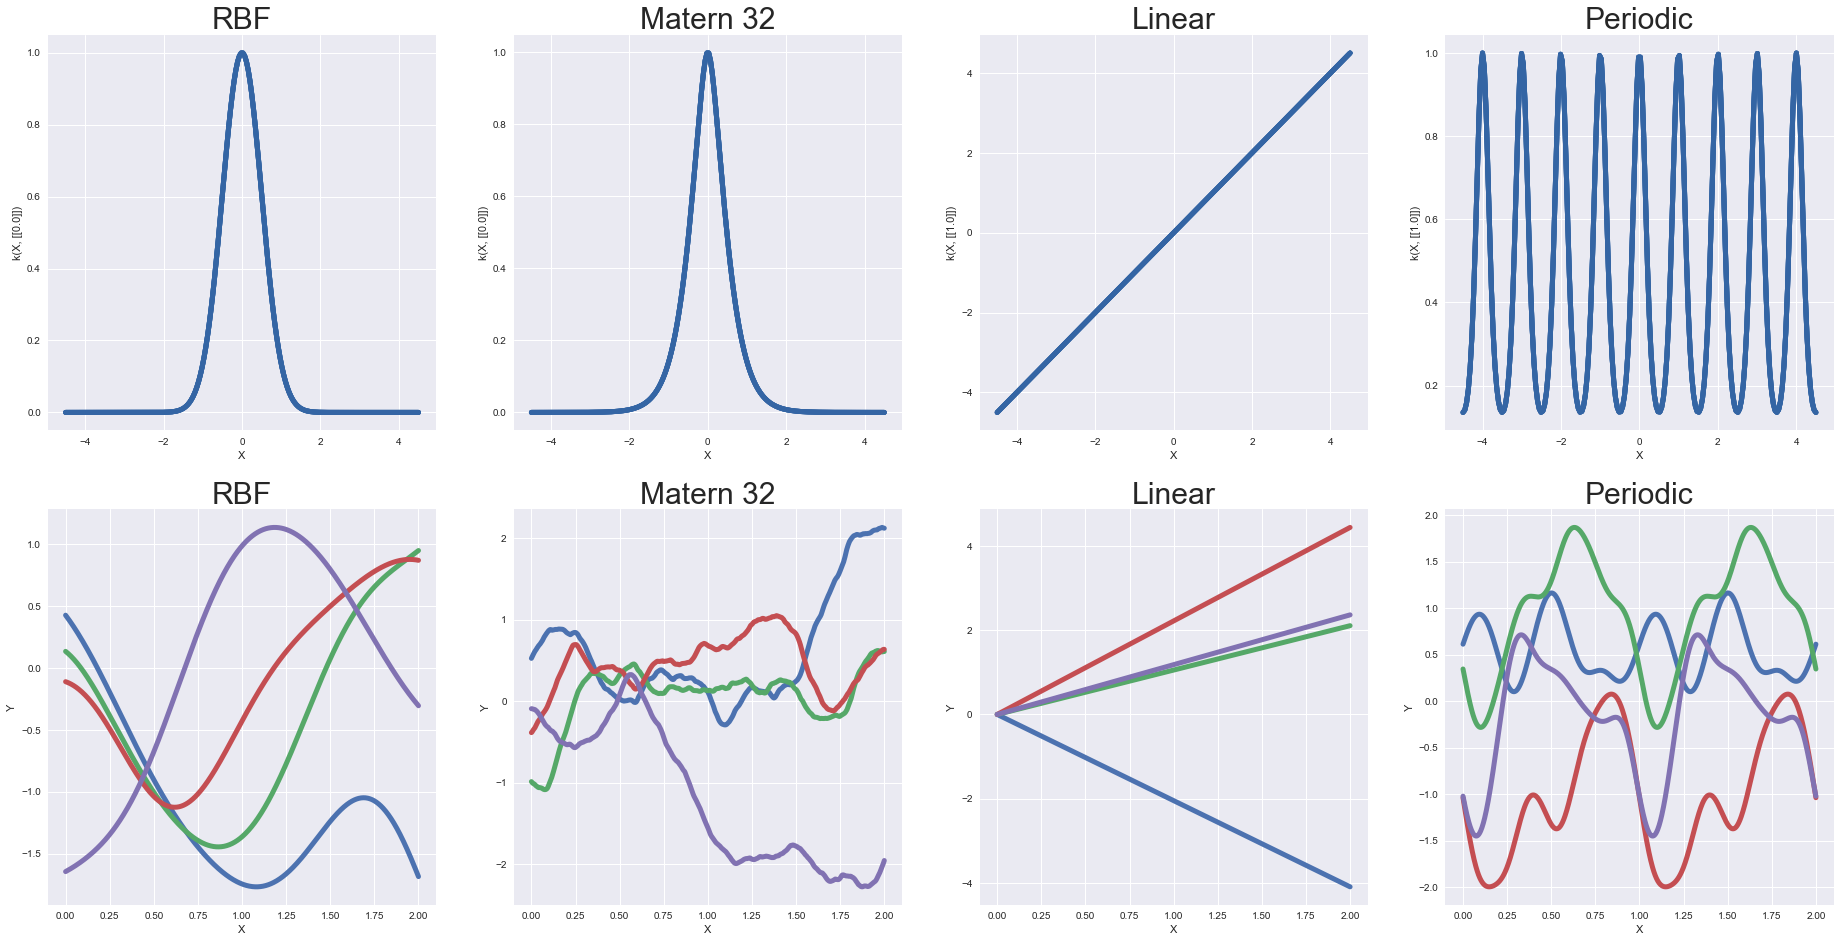

In [59]:


np.random.seed(1)
kernels = [
    (GPy.kern.RBF(input_dim=1,lengthscale=0.5), 'RBF'),
    (GPy.kern.Matern32(input_dim=1,lengthscale=0.5), 'Matern 32'),
    (GPy.kern.Linear(input_dim=1), 'Linear'),
    (GPy.kern.StdPeriodic(input_dim=1, lengthscale=0.5), 'Periodic'),
]

d = 800
X = np.linspace(0., 2., d)
X = X[:,None]

fig, axs = plot_grid(
    2, len(kernels)
)

ix = lambda i, j: axs[j][i]

title_font_size = 30
line_width = 5
for i, (k, title) in enumerate(kernels):
    mu = np.zeros((d))
    C = k.K(X,X)
    n_samples = 4
    Z = np.random.multivariate_normal(mu, C, n_samples)
    for n in range(n_samples):
        k.plot(ax=ix(i, 0), linewidth=line_width)
        ix(i, 0).set_title(title, fontsize=title_font_size)

        ix(i, 1).plot(X[:],Z[n,:], linewidth=line_width)
        ix(i, 1).set_xlabel('X')
        ix(i, 1).set_ylabel('Y')
        ix(i, 1).set_title(title, fontsize=title_font_size)

save_figure(fig, 'kernel-priors-vert.pdf')


# Plot compound kernels 

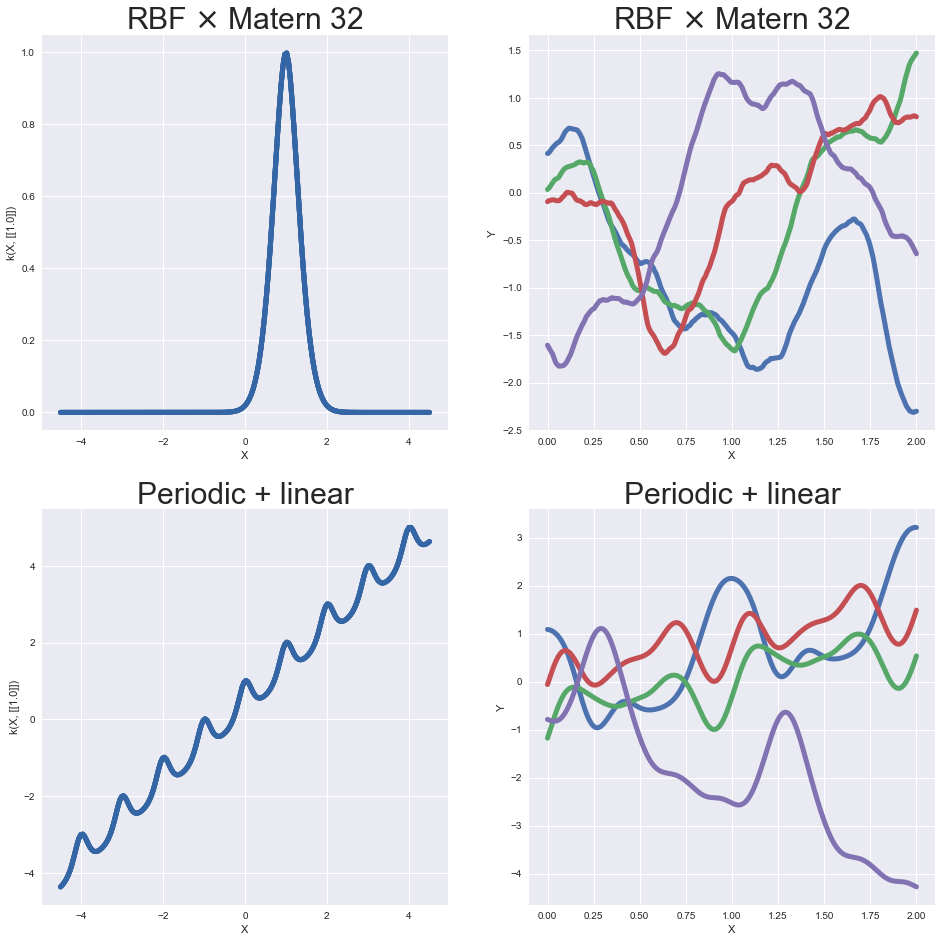

In [61]:
np.random.seed(1)
kernels = [
    (GPy.kern.RBF(input_dim=1,lengthscale=0.5)*GPy.kern.Matern32(input_dim=1,lengthscale=0.5), r'RBF $\times$ Matern 32'),
    (GPy.kern.StdPeriodic(input_dim=1, lengthscale=0.5) + GPy.kern.Linear(input_dim=1), 'Periodic + linear')
]

d = 800
X = np.linspace(0., 2., d)
X = X[:,None]

fig, axs = plot_grid(
    2, len(kernels)
)

ix = lambda i, j: axs[j][i]

title_font_size = 30
line_width = 5
for i, (k, title) in enumerate(kernels):
    mu = np.zeros((d))
    C = k.K(X,X)
    n_samples = 4
    Z = np.random.multivariate_normal(mu, C, n_samples)
    for n in range(n_samples):
        k.plot(ax=ix(0, i), linewidth=line_width)
        ix(0, i).set_title(title, fontsize=title_font_size)

        ix(1, i).plot(X[:],Z[n,:], linewidth=line_width)
        ix(1, i).set_xlabel('X')
        ix(1, i).set_ylabel('Y')
        ix(1, i).set_title(title, fontsize=title_font_size)

save_figure(fig, 'compound-kernels.pdf')


# Plot credible intervals

Text(17.200000000000003, 0.5, 'y')

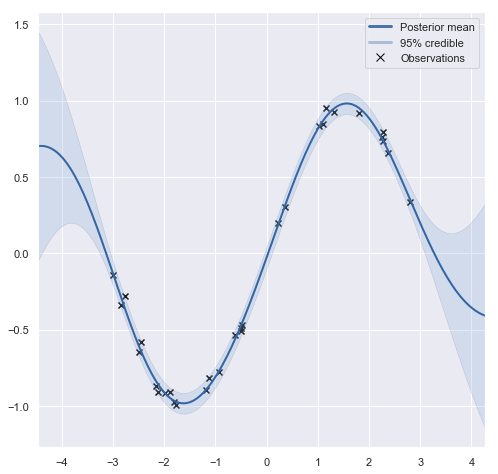

In [89]:
import GPy
import numpy as np
from IPython.display import display
from plotting import plot_grid
np.random.seed(1)

sns.set(style="darkgrid")

X = np.random.uniform(-3.,3.,(30,1))
Y = np.sin(X) + np.random.randn(30,1)*0.05
kernel = GPy.kern.RBF(input_dim=1, variance=2., lengthscale=1.)
m = GPy.models.GPRegression(X,Y,kernel)
fig, ax = plot_grid(
    1, 1
)

m.likelihood.variance = 0.001
m.likelihood.variance.fix()
m.optimize()
m.plot(ax=ax, legend=False)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

#x = mpatches.Patch(color='black', label='Data')
#x2 = mpatches.Patch(color='blue', label='Mean')
#plt.legend(handles=[x,x2])

from matplotlib.lines import Line2D

lines = [
    Line2D([0], [0], color='#4974AC', linewidth=3, linestyle='-'),
    Line2D([0], [0], color='#ABBCD3', linewidth=3, linestyle='-'),
    Line2D([], [], color='black', linewidth=0, markersize=8, marker='x')
]
labels = ['Posterior mean', '95% credible', 'Observations']
ax.legend(lines, labels)

axs.set_xlabel('x')
axs.set_ylabel('y')

# Plot small likelihoods due to singleton motion patterns

In [2]:
from math import sqrt
seg_dict = dict(tuple(data.groupby('seg')))
def normalisation(seg):
    dx = seg.x.mean()
    dy = seg.y.mean()
    sd  = sqrt(max(seg.x.var(), seg.y.var()))
    def do_normalisation(data):
        data.x = (data.x - dx)/sd
        data.y = (data.y - dy)/sd
        return data
    
    return {
        'scale': do_normalisation,
        'sd': sd,
        'dx': dx,
        'dy': dy
    }
seg_norms = {
    seg_n: normalisation(seg_dict[seg_n])
    for seg_n in seg_dict
}

def normaliser_for_seg(seg_n):
    return seg_norms[seg_n] 

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

Optimization restart 1/3, f = -39.85904131172405
Optimization restart 2/3, f = -39.85904131177319
Optimization restart 3/3, f = -39.85904131160766


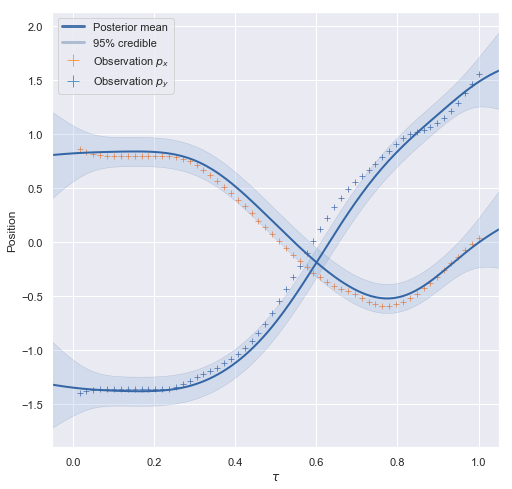

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import display, clear_output
from plotting import plot_grid
from model import learn_function, plot_function, gamma_prior, FunctionModelPriors, TrajectoryModel, predict, compute_tau
from pandas import DataFrame
import GPy

sns.set(style="darkgrid")

np.random.seed(12345)
trajs_pickle_path = '../data/train3.pkl'
data = pd.read_pickle(trajs_pickle_path)
n_trajs = list(data.traj.unique())
n_trajs_to_use = 20 # len(n_trajs)
trajs_to_use = frozenset(np.random.choice(n_trajs, size=n_trajs_to_use, replace=False))
trajs = data[data.traj.transform(lambda j: j in trajs_to_use)]
traj_ixs = trajs.traj.unique()

route_n = 3
seg_n = 5
traj_n = 0
seg = trajs[(trajs.traj == traj_ixs[traj_n+1]) & (trajs.seg == seg_n)]
seg['tau'] = compute_tau(seg)
seg = normaliser_for_seg(seg_n)['scale'](seg)
domain = ['tau']
codomain = ['x', 'y']
likelihood = 0.06
kernel = GPy.kern.Matern32(
    input_dim=len(domain),
    ARD=True
)
    
f = learn_function(
    seg, domain, codomain,
    kernel, 'f', fixed_likelihood=likelihood
)

seg2 = trajs[(trajs.traj == traj_ixs[traj_n+4]) & (trajs.seg == seg_n)]
seg2['tau'] = compute_tau(seg2)
seg2 = normaliser_for_seg(seg_n)['scale'](seg2)
fig, ax = plot_grid(1, 1)
f.model.plot_f(ax=ax, plot_limits=[-0.05, 1.05], legend=0)
sns.scatterplot(data=seg2, x='tau', y='x', ax=ax, marker='+')
sns.scatterplot(data=seg2, x='tau', y='y', ax=ax, marker='+')
ax.set_ylabel('Position')
ax.set_xlabel(r'$\tau$')

from matplotlib.lines import Line2D

lines = [
    Line2D([0], [0], color='#4974AC', linewidth=3, linestyle='-'),
    Line2D([0], [0], color='#ABBCD3', linewidth=3, linestyle='-'),  ##E2EBF5
    Line2D([0], [0], color='#FF9E4A', linewidth=0, markersize=12, marker='+'),
    Line2D([0], [0], color='#5698C6', linewidth=0, markersize=12, marker='+')
]
labels = ['Posterior mean', '95% credible', r'Observation $p_x$', r'Observation $p_y$']
ax.legend(lines, labels)
#ax.legend()

Optimization restart 1/1, f = -256.3851365459013


Optimization restart 1/1, f = -18.606302318330933


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Optimization restart 1/1, f = -3305.6548666874996


Optimization restart 1/1, f = -241.466339599811


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


GP_regression.,value,constraints,priors
sum.rbf.variance,0.07418040768730597,+ve,
sum.rbf.lengthscale,0.4094476709456025,+ve,
sum.linear.variances,0.6022680366765981,+ve,
Gaussian_noise.variance,0.00010606108891790045,+ve,


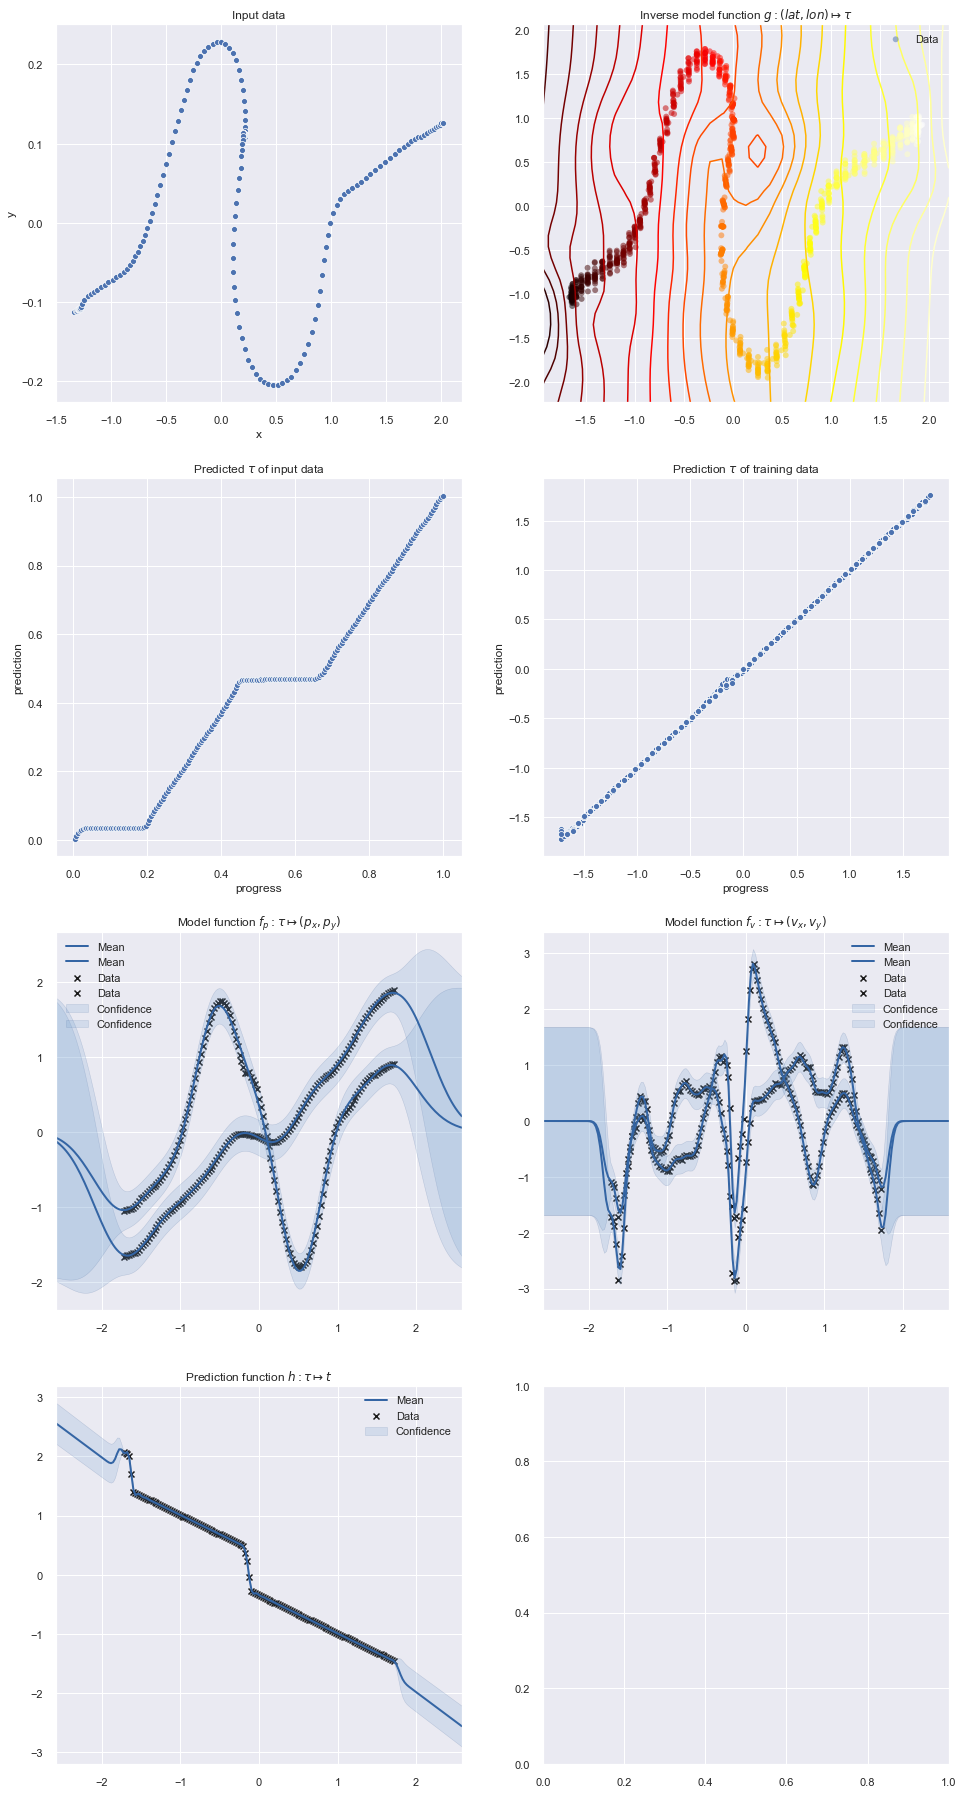

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import display, clear_output
from model import learn_trajectory_model, plot_function, gamma_prior, FunctionModelPriors, TrajectoryModel, predict, compute_tau
from pandas import DataFrame

np.random.seed(12345)
trajs_pickle_path = '../data/train3.pkl'
data = pd.read_pickle(trajs_pickle_path)
n_trajs = list(data.traj.unique())
n_trajs_to_use = 20 # len(n_trajs)
trajs_to_use = frozenset(np.random.choice(n_trajs, size=n_trajs_to_use, replace=False))
trajs = data[data.traj.transform(lambda j: j in trajs_to_use)]
traj_ixs = trajs.traj.unique()

from math import sqrt
seg_dict = dict(tuple(data.groupby('seg')))
def normalisation(seg):
    dx = seg.x.mean()
    dy = seg.y.mean()
    sd  = sqrt(max(seg.x.var(), seg.y.var()))
    def do_normalisation(data):
        data.x = (data.x - dx)/sd
        data.y = (data.y - dy)/sd
        return data
    
    return {
        'scale': do_normalisation,
        'sd': sd,
        'dx': dx,
        'dy': dy
    }
seg_norms = {
    seg_n: normalisation(seg_dict[seg_n])
    for seg_n in seg_dict
}

def normaliser_for_seg(seg_n):
    return seg_norms[seg_n] 

from math import sqrt, cos, sin, radians
from plotting import plot_grid

%matplotlib inline
sns.set(style="darkgrid")

def compute_time_left(data: DataFrame) -> DataFrame:
    sorted_data = data.sort_values('timestamp')
    arrival_time = sorted_data.iloc[-1].timestamp
    sorted_data['time_left'] = [
        (arrival_time - t).seconds
        for t in sorted_data.timestamp
    ]
    return sorted_data
    
def drop_start_dwell(data):
    # https://stackoverflow.com/questions/52907328/pandas-delete-first-n-rows-until-condition-on-columns-is-fulfilled
    return data.loc[((data.dx > 0) & (data.dy > 0)).idxmax():]
    
def learn_model(data: DataFrame, route_n: int, seg_n: int, f_p_codomain, f_v_codomain) -> TrajectoryModel:
    f_p_priors = FunctionModelPriors(None, None, None)
    f_v_priors = FunctionModelPriors(None, None, None)
    g_kern_ls_prior = None #gamma_prior(0.5, .002)
    g_kern_var_prior = None # gamma_prior(1, .5)
    g_kern_lik_prior = None
    g_priors = FunctionModelPriors(
        g_kern_ls_prior, 
        g_kern_var_prior, 
        g_kern_lik_prior)
    h_priors = FunctionModelPriors(None, None, None)

    n_restarts = 1
    D = data.shape[0]
    fix_f_p_likelihood = 3 / D
    fix_f_v_likelihood = 3 / D
    n_augment_samples = 15
    augment_sigma = 4 / normaliser_for_seg(seg_n)['sd']# 5e-5
    augment_delta = 0.015 
    stop_compress_delta = 5e-3

    return learn_trajectory_model(
        normalise['scale'](drop_start_dwell(data)), 
        route_n,
        seg_n,
        f_p_codomain,
        f_v_codomain, 
        f_p_codomain,
        f_p_priors=f_p_priors,
        f_v_priors=f_v_priors,
        g_priors=g_priors,
        h_priors=h_priors,
        n_restarts=n_restarts,    
        stop_compress_delta=stop_compress_delta,
        fix_f_p_likelihood=fix_f_p_likelihood,
        fix_f_v_likelihood=fix_f_v_likelihood,
        n_augment_samples=n_augment_samples,
        augment_sigma=augment_sigma,
        augment_delta=augment_delta)

def plot_model(m: TrajectoryModel, data: DataFrame, f_p_codomain, f_v_codomain):
    n_rows = 4
    n_cols = 2
    fig_size = 8
    _, axs = plot_grid(n_rows, n_cols)

    # Input data
    sns.scatterplot(
        data=data, 
        x=f_p_codomain[0], 
        y=f_p_codomain[1], 
        ax=axs[0][0]
    )
    axs[0][0].set_title('Input data')

    # h for input data
    x = data[f_p_codomain].values
    mean, _  = predict(m.g, x)
    progress = compute_tau(x)
    df = pd.DataFrame({
        'prediction': mean.T[0], 
        'progress': progress
    })
    sns.scatterplot(
        data=df, 
        x='progress', 
        y='prediction', 
        ax=axs[1][0]
    )
    axs[1][0].set_title(r'Predicted $\tau$ of input data')
    #axs[1][0].set_aspect('equal', 'datalim')

    # Training data
    plot_function(m.g, ax=axs[0][1])
    axs[0][1].set_title(r'Inverse model function $g: (lat,lon) \mapsto \tau$')

    # H for training data
    mean, _  = m.g.model.predict(m.g.model.X)
    df = pd.DataFrame({
        'prediction': mean.T[0], 
        'progress': m.g.model.Y.flatten()
    })
    sns.scatterplot(
        data=df, 
        x='progress', 
        y='prediction', 
        ax=axs[1][1]
    )
    axs[1][1].set_title(r'Prediction $\tau$ of training data')

    # f_p
    m.f_p.model.plot(ax=axs[2][0])
    #plot_function(m.f_p, ax=axs[2][0])
    axs[2][0].set_title(r'Model function $f_p: \tau \mapsto (p_x, p_y)$')

    
    # f_v
    plot_function(m.f_v, ax=axs[2][1])
    axs[2][1].set_title(r'Model function $f_v: \tau \mapsto (v_x, v_y)$')

    # h
    plot_function(m.h, ax=axs[3][0])
    axs[3][0].set_title(r'Prediction function $h: \tau \mapsto t$')

route_n = 3
seg_n = 9
traj_n = 0
normalise = normaliser_for_seg(seg_n)
seg = trajs[(trajs.traj == traj_ixs[traj_n]) & (trajs.seg == seg_n)]
timed_seg = compute_time_left(seg)
f_p_codomain = ['x', 'y']
f_v_codomain = ['dx', 'dy']
m = learn_model(
    timed_seg, route_n, seg_n, 
    f_p_codomain, f_v_codomain
)
plot_model(m, timed_seg, f_p_codomain, f_v_codomain)
m.g.model

## Load training data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from itertools import repeat
from IPython.display import display, clear_output
from pandas import DataFrame

from model.pre_process import pre_process, normaliser_for_seg

%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')
np.random.seed(1)
trajs_pickle_path = '../data/train3.pkl'
data = pd.read_pickle(trajs_pickle_path)
n_trajs = list(data.traj.unique())
n_trajs_to_use = 100 #len(n_trajs)
trajs_to_use = frozenset(np.random.choice(n_trajs, size=n_trajs_to_use, replace=False))
trajs = data[data.traj.transform(lambda j: j in trajs_to_use)]
train_traj_ids = trajs.traj.unique()
train_seg_ids  = trajs.seg.unique()

# Segment normaliser
seg_dict = dict(tuple(data.groupby('seg')))
seg_normalisers = {
    seg_n: normaliser_for_seg(seg_dict[seg_n])
    for seg_n in seg_dict
}

def load_train_seg(traj_n, seg_n):
    return trajs[(trajs.traj == traj_n) & (trajs.seg == seg_n)]

def in_sample_seg_loader(seg_n, traj_n, seg_size=1):
    print('loading segment', seg_n, traj_n, seg_size)
    return pre_process(
        load_train_seg(traj_n, seg_n), 
        stop_compress_delta, 
        seg_normalisers[seg_n],
        seg_size
    )

## Learn a model

loading segment 1 58 1
Optimization restart 1/3, f = -120.05868816645375
Optimization restart 2/3, f = -120.05868816481723
Optimization restart 3/3, f = -120.05868816663579
Optimization restart 1/3, f = -151.74301141672956
Optimization restart 2/3, f = -151.7430114168141
Optimization restart 3/3, f = -151.7430114168242
Optimization restart 1/3, f = -799.2602174228134
Optimization restart 2/3, f = -799.2602174218301
Optimization restart 3/3, f = -799.2602174229494
Optimization restart 1/3, f = -799.157639736046
Optimization restart 2/3, f = -799.1576396691092
Optimization restart 3/3, f = -799.1576397404916
Optimization restart 1/3, f = -826.8489830980045
Optimization restart 2/3, f = -826.848983097997
Optimization restart 3/3, f = -826.84898309765
Optimization restart 1/3, f = -827.421724083721


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 2/3, f = -827.4217240786448
Optimization restart 3/3, f = -827.4217240850052
Optimization restart 1/3, f = 75.30762005693587
Optimization restart 2/3, f = 75.30762005693715


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 3/3, f = 75.30762010683499
Optimization restart 1/3, f = 16.88012194658741
Optimization restart 2/3, f = 16.8801219465874
Optimization restart 3/3, f = 16.880121946586975
Optimization restart 1/3, f = -427.2807857808975
Optimization restart 2/3, f = -427.28078578006034
Optimization restart 3/3, f = -427.2807857859077


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 1/3, f = -426.59043365975896
Optimization restart 2/3, f = -426.59043366272516


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 3/3, f = -426.5904336672648
Optimization restart 1/3, f = -667.5985390495507


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 2/3, f = -667.5985390643627
Optimization restart 3/3, f = -667.5985390528671
Optimization restart 1/3, f = -667.6044288975149
Optimization restart 2/3, f = -667.6044289021941
Optimization restart 3/3, f = -667.6044289208556
Optimization restart 1/3, f = -254.66141777980022
Optimization restart 2/3, f = -254.66141777980158
Optimization restart 3/3, f = -254.66141777820707
Optimization restart 1/3, f = 166.17517733370656
Optimization restart 2/3, f = 166.13716602335222
Optimization restart 3/3, f = 166.18173625270464


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


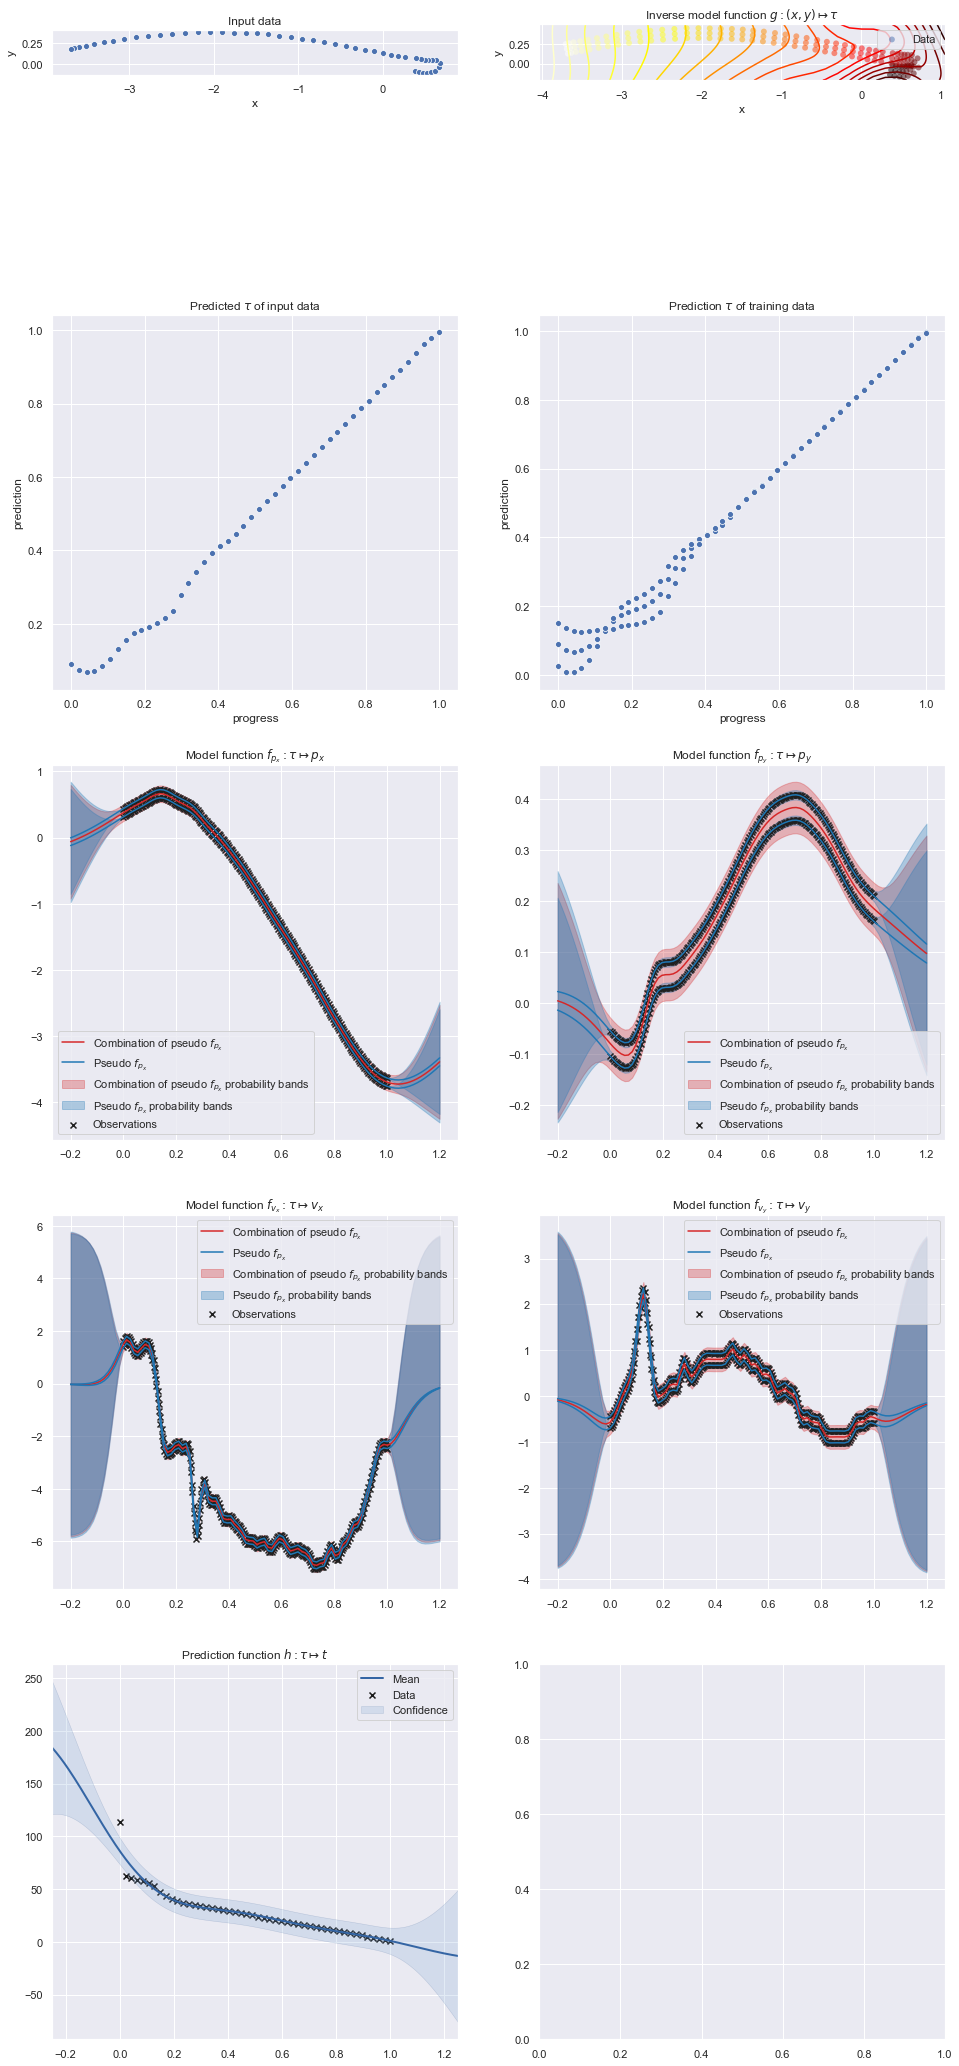

In [23]:
from math import sqrt, cos, sin, radians
import seaborn as sns
import GPy
from GPy.models import GPRegression
from typing import List
from model.trajectory_model import learn_model, plot_model, plot_model_functions

%matplotlib inline
sns.set(style="darkgrid")

np.random.seed(1)

# What to load
route_n = 3
seg_n = 1 # 1-indexed
train_traj_n = 1 # 0-indexed
stop_compress_delta = 5 # meters
train_traj_id = train_traj_ids[train_traj_n]
seg = in_sample_seg_loader(seg_n, train_traj_id)
normaliser = seg_normalisers[seg_n]
f_p_codomain = ['x', 'y']
f_v_codomain = ['dx', 'dy']
f_p_likelihood_noise = .5 / normaliser.p_scale  # meters
f_v_likelihood_noise = .0000000001 / normaliser.v_scale # m/s
delta_xy = 10 / normaliser.p_scale    # metres, spatial cluster width
delta_p = 4 / normaliser.p_scale # metres, p cluster width
delta_v = .5 / normaliser.v_scale   # metres/second, v cluster width

m = learn_model(
    seg, route_n, seg_n, train_traj_n,
    f_p_codomain, f_v_codomain,
    f_p_likelihood_noise,
    f_v_likelihood_noise,
    normaliser,
    delta_xy, 
    delta_p, delta_v
)
plot_model(m, seg)

### Plot Pseudo clusters

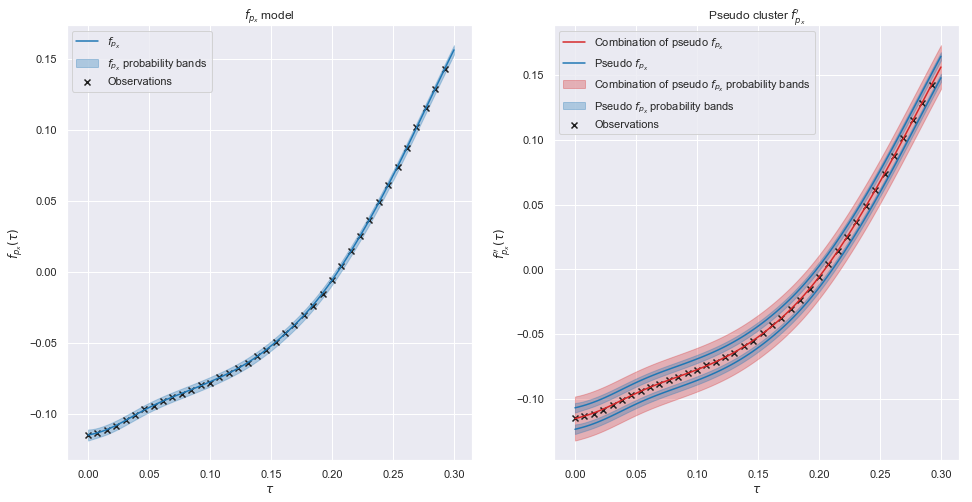

In [21]:
from model.trajectory_model import plot_with_combination
from model.plotting import plot_grid, plot_data, default_color
from model.function_model import plot_posterior

_, axs = plot_grid(1, 2)
ax0 = axs[0]
ax1 = axs[1]
tau_limit = 0.3
seg_to_plot = seg[seg.tau <= tau_limit]
tau_grid = np.linspace(0, tau_limit, 100)

mu, var = m.f_p_y.model.predict(tau_grid.reshape(-1, 1))
plot_posterior(ax0, tau_grid, mu, np.sqrt(var), r'$f_{p_x}$', default_color(0))
plot_data(ax0, seg_to_plot.tau, seg_to_plot.y)
ax0.set_title(r'$f_{p_x}$ model')
ax0.set_ylabel(r'$f_{p_x}(\tau)$')
ax0.set_xlabel(r'$\tau$')
ax0.legend()

plot_with_combination(ax1, tau_grid, m.f_p_y_1, m.f_p_y_2)
plot_data(ax1, seg_to_plot.tau, seg_to_plot.y)
ax1.set_title(r"Pseudo cluster $f_{p_x}'$")
ax1.set_ylabel(r"$f_{p_x}''(\tau)$")
ax1.set_xlabel(r'$\tau$')
ax1.legend()